In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn import metrics

In [30]:
df = pd.read_csv('../data/survey.csv')
print(df.shape)
df.head(15)

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [31]:
df.loc[len(df.index)] = ['Male', 27.0, 1.78, 75, 'no', 'no', 2.0, 2, 'Sometimes', 'no', 2, 'no', 2, 1, 'Sometimes', 'Automobile', 'Normal_Weight']

In [4]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes':1, 'no':0})
df['FAVC'] = df['FAVC'].map({'yes':1, 'no':0})
df['SMOKE'] = df['SMOKE'].map({'yes':1, 'no':0})
df['SCC'] = df['SCC'].map({'yes':1, 'no':0})

In [5]:
df = pd.get_dummies(data = df, columns = ['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first = True)
df.shape

(2111, 24)

In [5]:
# Train test split
X = df.drop(columns = ['NObeyesdad', 'Weight'])
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [60]:
# Pipelines
def pipe_model(model):
    pipe = Pipeline([
        ('ss', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    print(f'{model}')
    print(f'Training r2 score: {pipe.score(X_train, y_train)}')
    print(f'Testing r2 score: {pipe.score(X_test, y_test)}')
    print(f'Testing MSE: {metrics.mean_squared_error(y_test, pipe.predict(X_test))}')
    return print('='*40)

In [7]:
pipe_model(LinearRegression())
pipe_model(KNeighborsRegressor())
pipe_model(DecisionTreeRegressor())
pipe_model(BaggingRegressor())
pipe_model(RandomForestRegressor())
pipe_model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.583058887606605
Testing r2 score: 0.5776341443290094
Testing MSE: 298.905998367195
KNeighborsRegressor()
Training r2 score: 0.9112589623119534
Testing r2 score: 0.8092018277048589
Testing MSE: 135.02681954703345
DecisionTreeRegressor()
Training r2 score: 1.0
Testing r2 score: 0.7361159275934601
Testing MSE: 186.74931000416916
BaggingRegressor()
Training r2 score: 0.9811978811687787
Testing r2 score: 0.8471556570535224
Testing MSE: 108.16710278489663
RandomForestRegressor()
Training r2 score: 0.9864519349227345
Testing r2 score: 0.8591381437657225
Testing MSE: 99.68716269139193
AdaBoostRegressor()
Training r2 score: 0.7256750256636266
Testing r2 score: 0.6682036890037752
Testing MSE: 234.8104285923475


In [55]:
# Read Data
df = pd.read_csv('../data/survey.csv')

# Binarize columns
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes':1, 'no':0})
df['FAVC'] = df['FAVC'].map({'yes':1, 'no':0})
df['SMOKE'] = df['SMOKE'].map({'yes':1, 'no':0})
df['SCC'] = df['SCC'].map({'yes':1, 'no':0})

# Get dummies
df = pd.get_dummies(data = df, columns = ['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first = True)


In [56]:
# Create polynomial features
poly = PolynomialFeatures(2, interaction_only = True, include_bias = False)
array_poly = poly.fit_transform(df[['Height', 'FAVC', 'FCVC', 'NCP', 'CH2O']])

# Polynomial Feature Dataframe
df_poly = pd.DataFrame(array_poly, columns = poly.get_feature_names_out(['Height', 'FAVC', 'FCVC', 'NCP', 'CH2O']))

# Merge Polynomial Features df
df = df.merge(df_poly.iloc[:,4:], left_index = True, right_index = True)

# Create height^2 column
df['h2'] = df['Height'] ** 2

In [57]:
X = df.drop(columns = ['NObeyesdad', 'Weight'])
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [58]:
pipe = Pipeline([
        ('ss', StandardScaler()),
        ('rf', RandomForestRegressor())
    ])
pipe.fit(X_train, y_train)
print(f'Training r2 score: {pipe.score(X_train, y_train)}')
print(f'Testing r2 score: {pipe.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, pipe.predict(X_test))}')

Training r2 score: 0.9864113127187746
Testing r2 score: 0.8613699023715964
Testing MSE: 98.10775937257124


In [61]:
pipe_model(LinearRegression())
pipe_model(KNeighborsRegressor())
pipe_model(DecisionTreeRegressor())
pipe_model(BaggingRegressor())
pipe_model(RandomForestRegressor())
pipe_model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.5909953407191537
Testing r2 score: 0.5799892184442049
Testing MSE: 297.23932533910914
KNeighborsRegressor()
Training r2 score: 0.8984835144637466
Testing r2 score: 0.8121469030470617
Testing MSE: 132.94260588816837
DecisionTreeRegressor()
Training r2 score: 1.0
Testing r2 score: 0.7475530675067739
Testing MSE: 178.65530884769944
BaggingRegressor()
Training r2 score: 0.9811890288744408
Testing r2 score: 0.8425997929129042
Testing MSE: 111.39126283735492
RandomForestRegressor()
Training r2 score: 0.9866066551979703
Testing r2 score: 0.8624676737466339
Testing MSE: 97.3308725943698
AdaBoostRegressor()
Training r2 score: 0.7174039917693553
Testing r2 score: 0.6621327249526995
Testing MSE: 239.10681653747466


In [62]:
pipe = Pipeline([
        ('ss', StandardScaler()),
        ('rf', RandomForestRegressor())
    ])
pipe.fit(X_train, y_train)
print(f'Training r2 score: {pipe.score(X_train, y_train)}')
print(f'Testing r2 score: {pipe.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, pipe.predict(X_test))}')

Training r2 score: 0.9869866287058555
Testing r2 score: 0.865573672179698
Testing MSE: 95.1327745471518


In [63]:
# Removing from pipeline to get feature importances
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)
rf.feature_importances_

array([7.77691185e-02, 2.02508030e-02, 2.49518267e-01, 1.96356575e-04,
       6.13189684e-03, 1.62867984e-02, 3.39368540e-04, 2.75311220e-03,
       1.05655162e-03, 5.17291048e-02, 1.88463171e-02, 7.37435315e-02,
       4.35474440e-03, 2.96988549e-02, 1.93919839e-04, 1.03555979e-03,
       6.98204745e-02, 4.37233921e-03, 2.37496765e-05, 5.85404680e-05,
       1.61117846e-02, 4.78309752e-04, 3.75329683e-03, 8.67998549e-02,
       6.33280728e-02, 2.72006386e-02, 1.20741877e-02, 5.73732890e-02,
       1.93343596e-02, 3.99144154e-03, 4.19543324e-02, 6.03906824e-03,
       9.99167882e-03, 2.33902766e-02])

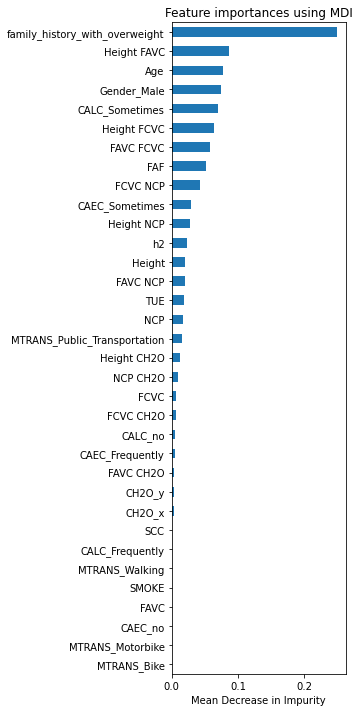

In [64]:
# From sklearn https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = X.columns
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values()

fig, ax = plt.subplots(figsize = (5,10))
forest_importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_xlabel("Mean Decrease in Impurity")
fig.tight_layout();

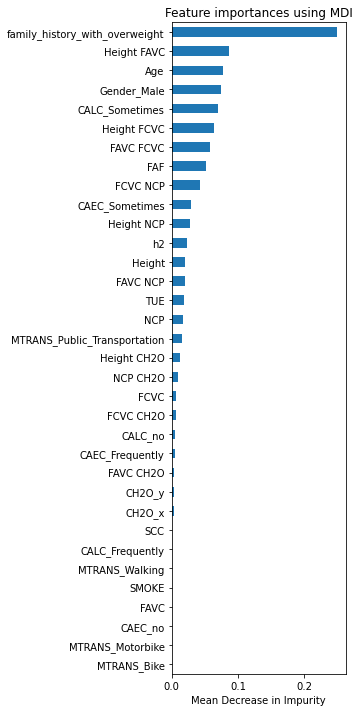

In [66]:
forest_importances.plot.barh(figsize = (5,10))
plt.title("Feature importances using MDI")
plt.xlabel("Mean Decrease in Impurity")
plt.tight_layout()
plt.savefig('../images/rfr_feat_importances.png');

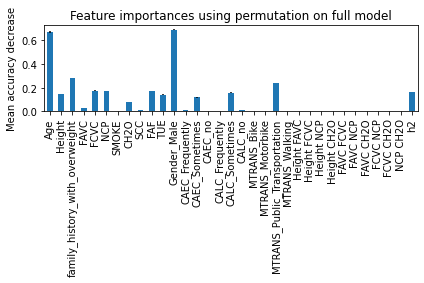

In [17]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X_test_sc, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show();

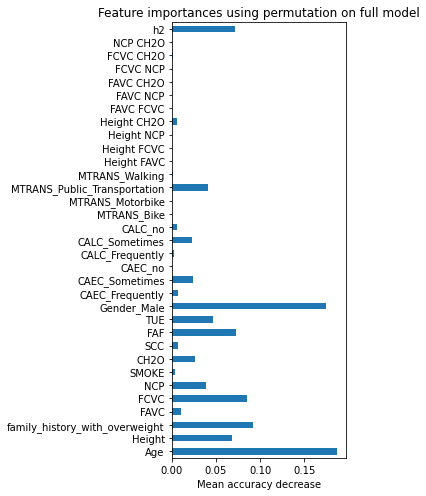

In [24]:
fig, ax = plt.subplots(figsize = (5,7))
forest_importances.plot.barh(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_xlabel("Mean accuracy decrease")
fig.tight_layout()
plt.savefig('../images/rfr_feat_importances.png');

In [72]:
# Read Data
df = pd.read_csv('../data/survey.csv')
df.loc[len(df.index)] = ['Male', 27.0, 1.78, 75, 'no', 'no', 2.0, 2, 'Sometimes', 'no', 2, 'no', 2, 1, 'Sometimes', 'Automobile', 'Normal_Weight']
# Binarize columns
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes':1, 'no':0})
df['FAVC'] = df['FAVC'].map({'yes':1, 'no':0})
df['SMOKE'] = df['SMOKE'].map({'yes':1, 'no':0})
df['SCC'] = df['SCC'].map({'yes':1, 'no':0})

# Get dummies
df = pd.get_dummies(data = df, columns = ['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first = True)

# Create polynomial features
poly = PolynomialFeatures(2, interaction_only = True, include_bias = False)
array_poly = poly.fit_transform(df[['Height', 'FAVC', 'FCVC', 'NCP', 'CH2O']])

# Polynomial Feature Dataframe
df_poly = pd.DataFrame(array_poly, columns = poly.get_feature_names_out(['Height', 'FAVC', 'FCVC', 'NCP', 'CH2O']))

# Merge Polynomial Features df
df = df.merge(df_poly.iloc[:,4:], left_index = True, right_index = True)

# Create height^2 column
df['h2'] = df['Height'] ** 2

In [79]:
X = df.drop(columns = ['NObeyesdad', 'Weight'])
X_ryan = X.iloc[-1:]

In [80]:
rf.predict(X_ryan)

C:\Users\rmped\miniconda3\envs\dsi\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([101.26521895])

In [50]:
# Read Data
df = pd.read_csv('../data/survey.csv')
df.loc[len(df.index)] = ['Male', 27.0, 1.78, 75, 'no', 'no', 2.0, 2, 'Sometimes', 'no', 2, 'no', 2, 1, 'Sometimes', 'Automobile', 'Normal_Weight']
# Binarize columns
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes':1, 'no':0})
df['FAVC'] = df['FAVC'].map({'yes':1, 'no':0})
df['SMOKE'] = df['SMOKE'].map({'yes':1, 'no':0})
df['SCC'] = df['SCC'].map({'yes':1, 'no':0})
df = pd.get_dummies(data = df, columns = ['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first = True)
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,0,0,1,0,0,1,0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0,1,0,0,1,0,0,0,1,0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0,1,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0,1,0,0,1,0,0,0,1,0


In [51]:
poly = PolynomialFeatures(2, interaction_only = True, include_bias = False)
array_poly = poly.fit_transform(df[['Height', 'FAVC', 'FCVC', 'NCP', 'CH2O']])

# Polynomial Feature Dataframe
df_poly = pd.DataFrame(array_poly, columns = poly.get_feature_names_out(['Height', 'FAVC', 'FCVC', 'NCP', 'CH2O']))

In [48]:
df_poly

,Height,FAVC,FCVC,NCP,CH2O,Height FAVC,Height FCVC,Height NCP,Height CH2O,FAVC FCVC,FAVC NCP,FAVC CH2O,FCVC NCP,FCVC CH2O,NCP CH2O
0,1.620000,0.0,2.0,3.0,2.000000,0.000000,3.240000,4.860000,3.240000,0.0,0.0,0.000000,6.0,4.000000,6.000000
1,1.520000,0.0,3.0,3.0,3.000000,0.000000,4.560000,4.560000,4.560000,0.0,0.0,0.000000,9.0,9.000000,9.000000
2,1.800000,0.0,2.0,3.0,2.000000,0.000000,3.600000,5.400000,3.600000,0.0,0.0,0.000000,6.0,4.000000,6.000000
3,1.800000,0.0,3.0,3.0,2.000000,0.000000,5.400000,5.400000,3.600000,0.0,0.0,0.000000,9.0,6.000000,6.000000
4,1.780000,0.0,2.0,1.0,2.000000,0.000000,3.560000,1.780000,3.560000,0.0,0.0,0.000000,2.0,4.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,1.748584,1.0,3.0,3.0,2.005130,1.748584,5.245752,5.245752,3.506138,3.0,3.0,2.005130,9.0,6.015390,6.015390
2108,1.752206,1.0,3.0,3.0,2.054193,1.752206,5.256618,5.256618,3.599369,3.0,3.0,2.054193,9.0,6.162579,6.162579
2109,1.739450,1.0,3.0,3.0,2.852339,1.739450,5.218350,5.218350,4.961501,3.0,3.0,2.852339,9.0,8.557017,8.557017
2110,1.738836,1.0,3.0,3.0,2.863513,1.738836,5.216508,5.216508,4.979179,3.0,3.0,2.863513,9.0,8.590539,8.590539


In [52]:
df_poly.iloc[:,4:]

,CH2O,Height FAVC,Height FCVC,Height NCP,Height CH2O,FAVC FCVC,FAVC NCP,FAVC CH2O,FCVC NCP,FCVC CH2O,NCP CH2O
0,2.000000,0.000000,3.240000,4.860000,3.240000,0.0,0.0,0.000000,6.0,4.000000,6.000000
1,3.000000,0.000000,4.560000,4.560000,4.560000,0.0,0.0,0.000000,9.0,9.000000,9.000000
2,2.000000,0.000000,3.600000,5.400000,3.600000,0.0,0.0,0.000000,6.0,4.000000,6.000000
3,2.000000,0.000000,5.400000,5.400000,3.600000,0.0,0.0,0.000000,9.0,6.000000,6.000000
4,2.000000,0.000000,3.560000,1.780000,3.560000,0.0,0.0,0.000000,2.0,4.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
2107,2.005130,1.748584,5.245752,5.245752,3.506138,3.0,3.0,2.005130,9.0,6.015390,6.015390
2108,2.054193,1.752206,5.256618,5.256618,3.599369,3.0,3.0,2.054193,9.0,6.162579,6.162579
2109,2.852339,1.739450,5.218350,5.218350,4.961501,3.0,3.0,2.852339,9.0,8.557017,8.557017
2110,2.863513,1.738836,5.216508,5.216508,4.979179,3.0,3.0,2.863513,9.0,8.590539,8.590539


In [53]:
df = df.merge(df_poly.iloc[:,4:], left_index = True, right_index = True)
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O_x,SCC,...,Height FAVC,Height FCVC,Height NCP,Height CH2O,FAVC FCVC,FAVC NCP,FAVC CH2O,FCVC NCP,FCVC CH2O,NCP CH2O
0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,0,...,0.0,3.24,4.86,3.24,0.0,0.0,0.0,6.0,4.0,6.0
1,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,1,...,0.0,4.56,4.56,4.56,0.0,0.0,0.0,9.0,9.0,9.0
2,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,0,...,0.0,3.60,5.40,3.60,0.0,0.0,0.0,6.0,4.0,6.0
3,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,0,...,0.0,5.40,5.40,3.60,0.0,0.0,0.0,9.0,6.0,6.0
4,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,0,...,0.0,3.56,1.78,3.56,0.0,0.0,0.0,2.0,4.0,2.0


In [54]:
df.shape

(2112, 35)